# Summary Statistics Analysis

## 1. Import Required Libraries


In [1]:
import pandas as pd
import numpy as np


## 2. Load the Dataset


In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Print confirmation message
print("Dataset successfully loaded.")

# Display first 5 rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset successfully loaded.

First 5 rows of the dataset:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportat

## 3. Compute BMI


In [3]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

# Print the first 5 computed BMI values
print("\nSample BMI calculations:")
print(df[["Weight", "Height", "BMI"]].head())


Sample BMI calculations:
   Weight  Height        BMI
0    64.0    1.62  24.386526
1    56.0    1.52  24.238227
2    77.0    1.80  23.765432
3    87.0    1.80  26.851852
4    89.8    1.78  28.342381


## 4. Compute Summary Statistics for Numerical Variables


In [4]:
numerical_vars = ["BMI", "FCVC", "NCP", "CH2O", "FAF", "TUE"]

summary_stats = df[numerical_vars].agg(["mean", "median", "std"])

# Print the results
print("\nNumerical Summary Statistics:")
print(summary_stats)


Numerical Summary Statistics:
              BMI      FCVC       NCP      CH2O       FAF       TUE
mean    29.700159  2.419043  2.685628  2.008011  1.010298  0.657866
median  28.719089  2.385502  3.000000  2.000000  1.000000  0.625350
std      8.011337  0.533927  0.778039  0.612953  0.850592  0.608927


## 5. Compute Summary Statistics for Categorical Variables


In [5]:
categorical_vars = ["CAEC", "FAVC", "CALC"]

# Mode (Most Frequent Category)
categorical_modes = df[categorical_vars].mode().iloc[0]

# Value Counts
categorical_summary = {var: df[var].value_counts() for var in categorical_vars}

# Print the mode results
print("\nCategorical Variable Modes:")
print(categorical_modes)

# Print value counts for each categorical variable
print("\nCategorical Variable Distributions:")
for var, counts in categorical_summary.items():
    print(f"\n{var} Distribution:")
    print(counts)



Categorical Variable Modes:
CAEC    Sometimes
FAVC          yes
CALC    Sometimes
Name: 0, dtype: object

Categorical Variable Distributions:

CAEC Distribution:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

FAVC Distribution:
FAVC
yes    1866
no      245
Name: count, dtype: int64

CALC Distribution:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


## 6. Display Results


In [6]:
print("\n--- Final Summary Statistics ---")

print("\nNumerical Variables Summary:")
print(summary_stats)

print("\nMost Frequent Categories for Categorical Variables:")
print(categorical_modes)

print("\nDistribution of Categorical Variables:")
for var, counts in categorical_summary.items():
    print(f"\n{var} Value Counts:")
    print(counts)



--- Final Summary Statistics ---

Numerical Variables Summary:
              BMI      FCVC       NCP      CH2O       FAF       TUE
mean    29.700159  2.419043  2.685628  2.008011  1.010298  0.657866
median  28.719089  2.385502  3.000000  2.000000  1.000000  0.625350
std      8.011337  0.533927  0.778039  0.612953  0.850592  0.608927

Most Frequent Categories for Categorical Variables:
CAEC    Sometimes
FAVC          yes
CALC    Sometimes
Name: 0, dtype: object

Distribution of Categorical Variables:

CAEC Value Counts:
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

FAVC Value Counts:
FAVC
yes    1866
no      245
Name: count, dtype: int64

CALC Value Counts:
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


## Skewness Analysis of BMI Distribution


In [7]:
from scipy.stats import skew

bmi_skewness = skew(df["BMI"])
print(f"Skewness of BMI Distribution: {bmi_skewness:.2f}")



Skewness of BMI Distribution: 0.15


# **BMI Distribution Visualisation**


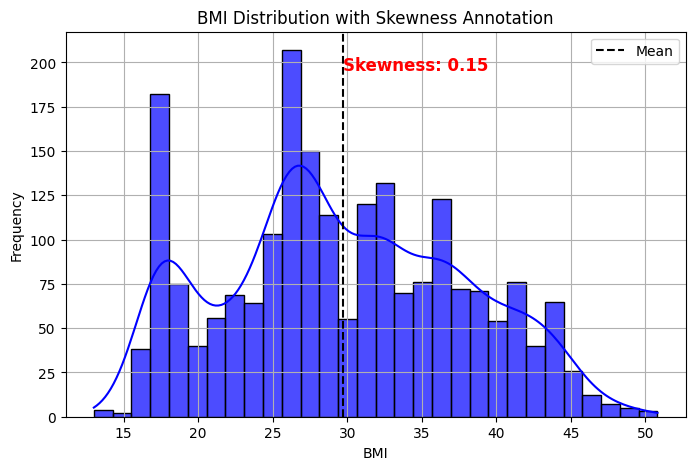

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Compute skewness
bmi_skewness = skew(df["BMI"])

# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(df["BMI"], kde=True, bins=30, color='blue', alpha=0.7)

# Add skewness annotation
plt.text(x=df["BMI"].mean(), y=plt.ylim()[1] * 0.9, 
         s=f"Skewness: {bmi_skewness:.2f}", 
         fontsize=12, color='red', weight='bold')

# Add title and labels
plt.title("BMI Distribution with Skewness Annotation")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.axvline(df["BMI"].mean(), color='black', linestyle='dashed', label='Mean')

# Show plot
plt.legend()
plt.grid(True)
plt.show()



# Identifying Outliers

## Boxplot of BMI


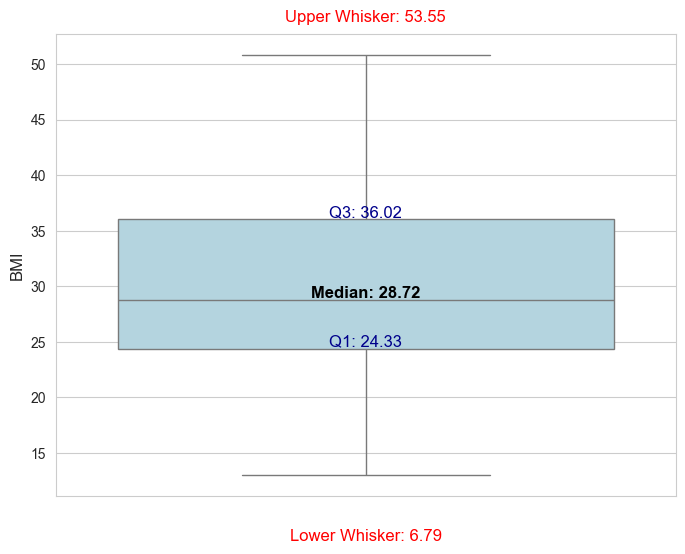

In [10]:
# Ensure BMI column exists in the dataset
if 'BMI' not in df.columns:
    raise ValueError("Column 'BMI' not found in dataset. Check column names.")

# Compute boxplot statistics
Q1 = df['BMI'].quantile(0.25)  # 25th percentile (Lower Quartile)
Q3 = df['BMI'].quantile(0.75)  # 75th percentile (Upper Quartile)
IQR = Q3 - Q1  # Interquartile range
median = df['BMI'].median()  # Median value
lower_whisker = Q1 - 1.5 * IQR  # Lower whisker bound
upper_whisker = Q3 + 1.5 * IQR  # Upper whisker bound

# Set seaborn style
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=df['BMI'], color="lightblue")

# Annotate the boxplot
plt.text(0, median, f'Median: {median:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(0, Q1, f'Q1: {Q1:.2f}', ha='center', va='bottom', fontsize=12, color='darkblue')
plt.text(0, Q3, f'Q3: {Q3:.2f}', ha='center', va='bottom', fontsize=12, color='darkblue')
plt.text(0, lower_whisker, f'Lower Whisker: {lower_whisker:.2f}', ha='center', va='bottom', fontsize=12, color='red')
plt.text(0, upper_whisker, f'Upper Whisker: {upper_whisker:.2f}', ha='center', va='bottom', fontsize=12, color='red')

# Remove title and keep only the axis label
plt.ylabel("BMI", fontsize=12)

# Show the plot
plt.show()


# Correlation Analysis

## Correlation Matrix (Heatmap)


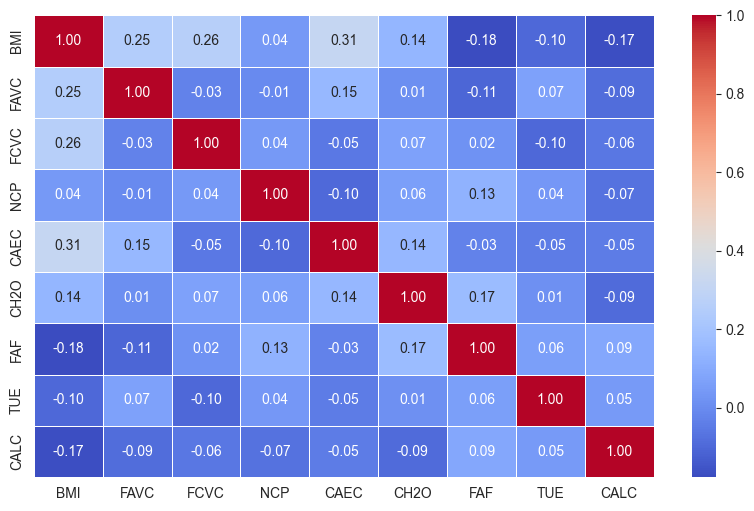

In [11]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset to avoid modifying the original
df_encoded = df.copy()

# Define categorical variables that need encoding
categorical_cols = ['FAVC', 'CAEC', 'CALC']

# Apply Label Encoding to categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store encoders for reference

# Select only relevant variables for correlation analysis
selected_vars = ['BMI', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC']
df_selected = df_encoded[selected_vars]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Set plot size
plt.figure(figsize=(10, 6))

# Create the heatmap (WITHOUT title)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Show the heatmap without a title
plt.show()


## Dataset Cleanse
This section prepares the dataset by retaining only the relevant features for clustering and supervised learning. 
We keep the precomputed **BMI** variable and select features that were previously analysed.


In [12]:
# Retain only relevant columns (including precomputed BMI)
selected_columns = ["BMI", "FAVC", "FCVC", "NCP", "CAEC", "CH2O", "FAF", "TUE", "CALC", "NObeyesdad"]
df_selected = df[selected_columns].copy()

# Save the cleansed dataset
df_selected.to_csv("cleaned_obesity_data.csv", index=False)
print("Cleansed dataset saved successfully!")


Cleansed dataset saved successfully!
